In [61]:
# import os
# import json
# import pandas as pd

# # Initialize 'result' with the expected columns if it doesn't exist
# columns = [
#     'folder', 'trend_def', 'features', 'model_type', 'predict_steps', 'weight_after_reversal',
#     'trend_accuracy', 'trend_precision', 'trend_recall', 'trend_f1',
#     'reversed_trend_accuracy', 'reversed_trend_precision', 'reversed_trend_recall', 'reversed_trend_f1',
#     'signal_accuracy', 'signal_precision', 'signal_recall', 'signal_f1',
#     'roc_auc', 'pred_days_difference_abs_mean', 'pred_in_advance', 'execution_time'
# ]

# result = pd.DataFrame(columns=columns)  # Ensure 'result' DataFrame has correct columns

# root_path = 'DNN_Projects_l2'

# # Iterate through folders and subfolders
# for folder in os.listdir(root_path):
#     first_path = os.path.join(root_path, folder)
#     for subfolder in os.listdir(first_path):
#         second_path = os.path.join(first_path, subfolder)
#         print(second_path)
#         summary_path = os.path.join(second_path, 'reports/summary.json')

#         # If the summary.json file does not exist, continue to the next iteration
#         if not os.path.exists(summary_path):
#             continue

#         with open(summary_path, 'r') as file:
#             trend_def = folder.split('-')[0] + ':' + folder.split('-')[1]
#             features = subfolder.split('-')[0]
#             content = json.load(file)  # Load JSON content
#             trend_confusion_matrix_info = content['trend_confusion_matrix_info']
#             reversed_trend_confusion_matrix_info = content['reversed_trend_confusion_matrix_info']
#             signal_confusion_matrix_info = content['signal_confusion_matrix_info']

#             # Create a DataFrame for the new row
#             newrow = pd.DataFrame({
#                 'folder': [folder],
#                 'trend_def': [trend_def],
#                 'features': [features],
#                 'model_type': [content['usingData']['model_type']],
#                 'predict_steps': [content['usingData']['predict_steps']],
#                 'weight_after_reversal': [content['usingData']['weight_after_reversal']],
#                 'trend_accuracy': [trend_confusion_matrix_info['Accuracy']['0']],
#                 'trend_precision': [trend_confusion_matrix_info['Precision']['0']],
#                 'trend_recall': [trend_confusion_matrix_info['Recall']['0']],
#                 'trend_f1': [trend_confusion_matrix_info['F1 Score']['0']],
#                 'reversed_trend_accuracy': [reversed_trend_confusion_matrix_info['Accuracy']['0']],
#                 'reversed_trend_precision': [reversed_trend_confusion_matrix_info['Precision']['0']],
#                 'reversed_trend_recall': [reversed_trend_confusion_matrix_info['Recall']['0']],
#                 'reversed_trend_f1': [reversed_trend_confusion_matrix_info['F1 Score']['0']],
#                 'signal_accuracy': [signal_confusion_matrix_info['Accuracy']['0']],
#                 'signal_precision': [signal_confusion_matrix_info['Precision']['0']],
#                 'signal_recall': [signal_confusion_matrix_info['Recall']['0']],
#                 'signal_f1': [signal_confusion_matrix_info['F1 Score']['0']],
#                 'roc_auc': [float(content['roc_auc'])],
#                 'pred_days_difference_abs_mean': [float(content['pred_days_difference_abs_mean'])],
#                 'pred_in_advance': [int(content['pred_in_advance'])],
#                 'execution_time': [float(content['execution_time'])]
#             })

#             # Concatenate the new row with 'result'
#             result = pd.concat([result, newrow], ignore_index=True)  # Ensure the index is reset

# print(result)  # Print the final DataFrame


In [62]:
import os
import pandas as pd
import json


result = pd.DataFrame(columns=[
    'file_name', 'trend_def', 'features', 'model_type', 
    'look_back', 'predict_steps',
    'roc_auc', 'execution_time', 'learning_rate'])
confusion_metrics_dict = {}

root_path = 'DNN_Projects_bit_more'
for folder in os.listdir(root_path):
    first_path = os.path.join(root_path, folder)
    for subfolder in os.listdir(first_path):
        second_path = os.path.join(first_path, subfolder)
        print(second_path)
        summary_path = os.path.join(second_path, 'reports/summary.json')
        newrow = pd.DataFrame(columns=result.columns)
        if not os.path.exists(summary_path):
            continue
        try:
            with open(summary_path, 'r') as file:
                trend_def = folder.split('-')[0]
                features = subfolder.split('-')[0]
                content = json.loads(file.read())
                confusion_metrics = pd.DataFrame(content['confusion metrics'])
                confusion_metrics_dict.update({folder: confusion_metrics})
                confusion_metrics.set_index('Class', inplace=True)
                online_training_epoch_num = subfolder.split('-')[-1]
                look_back = folder.split('-')[-3]
                predict_steps = folder.split('-')[-2]
                # Create a DataFrame for the new row
                newrow = pd.DataFrame({
                    'file_name': [folder],
                    'trend_def': [trend_def],
                    'features': [features],
                    'model_type': [content['using_data']['model_type']],
                    'look_back': look_back,
                    'predict_steps': predict_steps,
                    # 'learning_rate': [content['using_data']['learning_rate']],
                    # 'dropout': [content['using_data']['model_params']['DNN_3layers']['dropout']],
                    
                    'online_training_epoch_num': online_training_epoch_num,
                    'Accuracy': [confusion_metrics.loc['Macro-average', 'Accuracy']],
                    'Macro_F1': [confusion_metrics.loc['Macro-average', 'F1-Score']],
                    'Micro_F1': [confusion_metrics.loc['Micro-average', 'F1-Score']],
                    'pr_auc': [content['pr_auc']],
                    'roc_auc': [content['roc_auc']],
                    'kappa': [content['kappa']],
                    'mcc': [content['mcc']],
                    'execution_time': [content['execution_time']]
                })

                # Concatenate the new row with 'result'
                result = pd.concat([result, newrow], ignore_index=True)  # Ensure the index is reset
        except Exception as e:
            print(e)
            continue

DNN_Projects_bit_more/Close-2-1e-06-64-10-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/Close-15-1e-06-64-20-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/Close-4-1e-06-64-10-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/Close-3-1e-06-64-15-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/Close-5-1e-06-64-15-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/MA-3-1e-06-64-10-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/MA-3-1e-06-64-15-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/MA-4-1e-06-64-10-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/Close-10-1e-06-64-30-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/MA-2-1e-06-64-15-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/MA-10-1e-06-64-30-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_more/MA-15-1e-06-64-20-False/all-DNN_FlexibleLayers-1e-06-False
DNN_Projects_bit_m

In [63]:
result

,file_name,trend_def,features,model_type,look_back,predict_steps,roc_auc,execution_time,learning_rate,online_training_epoch_num,Accuracy,Macro_F1,Micro_F1,pr_auc,kappa,mcc
0,Close-2-1e-06-64-10-False,Close,all,DNN_FlexibleLayers,64,10,"[0.3833333333333333, 0.552801724137931, 0.5225...",687.225414,NaN,False,0.508197,0.340826,0.508197,"[0.0132, 0.5369, 0.506]",0.029692,0.029745
1,Close-15-1e-06-64-20-False,Close,all,DNN_FlexibleLayers,64,20,"[0.40499999999999997, 0.5927601809954751, 0.62...",349.673143,NaN,False,0.433333,0.436805,0.433333,"[0.3587, 0.4832, 0.282]",0.158416,0.163549
2,Close-4-1e-06-64-10-False,Close,all,DNN_FlexibleLayers,64,10,"[0.8218390804597702, 0.4954954954954955, 0.480...",166.845701,NaN,False,0.508197,0.339869,0.508197,"[0.1889, 0.4269, 0.5528]",0.045383,0.045630
3,Close-3-1e-06-64-15-False,Close,all,DNN_FlexibleLayers,64,15,"[nan, 0.6354166666666666, 0.5364583333333334]",486.126611,NaN,False,0.550000,0.366667,0.550000,"[0.5, 0.7879, 0.4238]",0.134615,0.145833
4,Close-5-1e-06-64-15-False,Close,all,DNN_FlexibleLayers,64,15,"[0.8461538461538461, 0.5805626598465473, 0.494...",606.241750,NaN,False,0.525000,0.344313,0.525000,"[0.0714, 0.6222, 0.3984]",0.048811,0.048882
5,MA-3-1e-06-64-10-False,MA,all,DNN_FlexibleLayers,64,10,"[0.5563636363636364, 0.7178649237472767, 0.687...",408.540205,NaN,False,0.590164,0.485926,0.590164,"[0.2212, 0.6496, 0.5916]",0.335222,0.337710
6,MA-3-1e-06-64-15-False,MA,all,DNN_FlexibleLayers,64,15,"[0.8194444444444444, 0.6441102756892231, 0.698...",382.831947,NaN,False,0.575000,0.408832,0.575000,"[0.2729, 0.5928, 0.5069]",0.246955,0.254859
7,MA-4-1e-06-64-10-False,MA,all,DNN_FlexibleLayers,64,10,"[0.5112179487179487, 0.7450549450549451, 0.707...",448.112350,NaN,False,0.508197,0.430732,0.508197,"[0.2194, 0.6737, 0.6261]",0.220613,0.221810
8,Close-10-1e-06-64-30-False,Close,all,DNN_FlexibleLayers,64,30,"[nan, 0.5476190476190477, 0.5714285714285714]",28.151504,NaN,False,0.550000,0.359761,0.550000,"[0.5, 0.7621, 0.5373]",0.134615,0.153522
9,MA-2-1e-06-64-15-False,MA,all,DNN_FlexibleLayers,64,15,"[0.9078947368421053, 0.64, 0.7272727272727273]",417.099211,NaN,False,0.625000,0.427598,0.625000,"[0.1964, 0.5969, 0.752]",0.284010,0.285310


In [64]:
# import os
# import pandas as pd

# result = pd.DataFrame(columns=['Filename', 'Trend_def', 'Features', 'Model', 'Predict_steps', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Total return', 'Execution Time', 'Sharpe ratio', 'Initial value', 'Final value'])
# # execution_time = pd.DataFrame(columns=['Filename', 'Execution Time'])
# # trade_summary = pd.DataFrame(columns=['Filename', 'Sharpe ratio', 'Initial value', 'Final value', 'Total return'])
# root_path = 'DNN_Projects'
# for folder in os.listdir(root_path):
#     first_path = os.path.join(root_path, folder)
#     for subfolder in os.listdir(first_path):
#         second_path = os.path.join(first_path, subfolder)
#         print(second_path)
#         summary_path = os.path.join(second_path, 'reports/summary.txt')
#         if not os.path.exists(summary_path):
#             continue
#         with open(summary_path, 'r') as file:
#             trend_def = folder.split('-')[0] + ':' + folder.split('-')[1]
#             features = subfolder.split('-')[0]
#             model = subfolder.split('-')[1]
#             predict_steps = subfolder.split('-')[-1]
            
#             content = file.read()
#             content = content.split('\n')
#             accuracy = content[2].split(': ')[1]
#             precision = content[3].split(': ')[1]
#             recall = content[4].split(': ')[1]
#             f1_score = content[5].split(': ')[1]
#             execution_time_ = content[8].split(': ')[1].split('seconds')[0]
#             sharpe_ratio = content[10].split(',')[1]
#             initial_value = content[10].split(',')[2]
#             final_value = content[10].split(',')[3]
#             total_return = content[10].split(',')[4]
#             filename = second_path
            
#             new_data = pd.DataFrame({'Filename': [filename], 'Trend_def':[trend_def], 'Features':[features], 'Model':[model], 'Predict_steps':[predict_steps], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1_score], 'Execution Time': [execution_time_], 'Sharpe ratio': [sharpe_ratio], 'Initial value': [initial_value], 'Final value': [final_value], 'Total return': [total_return]})
#             result = pd.concat([result, new_data], ignore_index=True)
        

In [65]:
result

,file_name,trend_def,features,model_type,look_back,predict_steps,roc_auc,execution_time,learning_rate,online_training_epoch_num,Accuracy,Macro_F1,Micro_F1,pr_auc,kappa,mcc
0,Close-2-1e-06-64-10-False,Close,all,DNN_FlexibleLayers,64,10,"[0.3833333333333333, 0.552801724137931, 0.5225...",687.225414,NaN,False,0.508197,0.340826,0.508197,"[0.0132, 0.5369, 0.506]",0.029692,0.029745
1,Close-15-1e-06-64-20-False,Close,all,DNN_FlexibleLayers,64,20,"[0.40499999999999997, 0.5927601809954751, 0.62...",349.673143,NaN,False,0.433333,0.436805,0.433333,"[0.3587, 0.4832, 0.282]",0.158416,0.163549
2,Close-4-1e-06-64-10-False,Close,all,DNN_FlexibleLayers,64,10,"[0.8218390804597702, 0.4954954954954955, 0.480...",166.845701,NaN,False,0.508197,0.339869,0.508197,"[0.1889, 0.4269, 0.5528]",0.045383,0.045630
3,Close-3-1e-06-64-15-False,Close,all,DNN_FlexibleLayers,64,15,"[nan, 0.6354166666666666, 0.5364583333333334]",486.126611,NaN,False,0.550000,0.366667,0.550000,"[0.5, 0.7879, 0.4238]",0.134615,0.145833
4,Close-5-1e-06-64-15-False,Close,all,DNN_FlexibleLayers,64,15,"[0.8461538461538461, 0.5805626598465473, 0.494...",606.241750,NaN,False,0.525000,0.344313,0.525000,"[0.0714, 0.6222, 0.3984]",0.048811,0.048882
5,MA-3-1e-06-64-10-False,MA,all,DNN_FlexibleLayers,64,10,"[0.5563636363636364, 0.7178649237472767, 0.687...",408.540205,NaN,False,0.590164,0.485926,0.590164,"[0.2212, 0.6496, 0.5916]",0.335222,0.337710
6,MA-3-1e-06-64-15-False,MA,all,DNN_FlexibleLayers,64,15,"[0.8194444444444444, 0.6441102756892231, 0.698...",382.831947,NaN,False,0.575000,0.408832,0.575000,"[0.2729, 0.5928, 0.5069]",0.246955,0.254859
7,MA-4-1e-06-64-10-False,MA,all,DNN_FlexibleLayers,64,10,"[0.5112179487179487, 0.7450549450549451, 0.707...",448.112350,NaN,False,0.508197,0.430732,0.508197,"[0.2194, 0.6737, 0.6261]",0.220613,0.221810
8,Close-10-1e-06-64-30-False,Close,all,DNN_FlexibleLayers,64,30,"[nan, 0.5476190476190477, 0.5714285714285714]",28.151504,NaN,False,0.550000,0.359761,0.550000,"[0.5, 0.7621, 0.5373]",0.134615,0.153522
9,MA-2-1e-06-64-15-False,MA,all,DNN_FlexibleLayers,64,15,"[0.9078947368421053, 0.64, 0.7272727272727273]",417.099211,NaN,False,0.625000,0.427598,0.625000,"[0.1964, 0.5969, 0.752]",0.284010,0.285310


In [66]:
result.sort_values(by=['mcc'], ascending=False, inplace=True)
result['mcc']

5     0.337710
9     0.285310
10    0.277350
17    0.274833
6     0.254859
16    0.227574
22    0.222733
7     0.221810
21    0.172431
1     0.163549
13    0.162994
8     0.153522
3     0.145833
14    0.144729
11    0.137762
15    0.093676
4     0.048882
2     0.045630
20    0.045283
0     0.029745
12   -0.030818
18   -0.050130
19   -0.119638
Name: mcc, dtype: float64

In [67]:
result

,file_name,trend_def,features,model_type,look_back,predict_steps,roc_auc,execution_time,learning_rate,online_training_epoch_num,Accuracy,Macro_F1,Micro_F1,pr_auc,kappa,mcc
5,MA-3-1e-06-64-10-False,MA,all,DNN_FlexibleLayers,64,10,"[0.5563636363636364, 0.7178649237472767, 0.687...",408.540205,NaN,False,0.590164,0.485926,0.590164,"[0.2212, 0.6496, 0.5916]",0.335222,0.337710
9,MA-2-1e-06-64-15-False,MA,all,DNN_FlexibleLayers,64,15,"[0.9078947368421053, 0.64, 0.7272727272727273]",417.099211,NaN,False,0.625000,0.427598,0.625000,"[0.1964, 0.5969, 0.752]",0.284010,0.285310
10,MA-10-1e-06-64-30-False,MA,all,DNN_FlexibleLayers,64,30,"[0.6111111111111112, 0.6565656565656566, 0.686...",269.220016,NaN,False,0.600000,0.421053,0.600000,"[0.5479, 0.6374, 0.5704]",0.272727,0.277350
17,MA-2-1e-06-64-10-False,MA,all,DNN_FlexibleLayers,64,10,"[0.5272727272727273, 0.6928879310344827, 0.712...",427.631753,NaN,False,0.590164,0.423707,0.590164,"[0.1127, 0.6646, 0.652]",0.273464,0.274833
6,MA-3-1e-06-64-15-False,MA,all,DNN_FlexibleLayers,64,15,"[0.8194444444444444, 0.6441102756892231, 0.698...",382.831947,NaN,False,0.575000,0.408832,0.575000,"[0.2729, 0.5928, 0.5069]",0.246955,0.254859
16,MA-4-1e-06-64-15-False,MA,all,DNN_FlexibleLayers,64,15,"[0.5485714285714286, 0.6766917293233083, 0.742...",561.758475,NaN,False,0.550000,0.401902,0.550000,"[0.1599, 0.6303, 0.7243]",0.224138,0.227574
22,MA-5-1e-06-64-15-False,MA,all,DNN_FlexibleLayers,64,15,"[0.5542857142857143, 0.7365728900255755, 0.765...",802.015700,NaN,False,0.550000,0.401003,0.550000,"[0.1543, 0.6151, 0.7854]",0.220779,0.222733
7,MA-4-1e-06-64-10-False,MA,all,DNN_FlexibleLayers,64,10,"[0.5112179487179487, 0.7450549450549451, 0.707...",448.112350,NaN,False,0.508197,0.430732,0.508197,"[0.2194, 0.6737, 0.6261]",0.220613,0.221810
21,MA-10-1e-06-64-20-False,MA,all,DNN_FlexibleLayers,64,20,"[0.585, 0.6704545454545454, 0.7361111111111112]",320.581075,NaN,False,0.433333,0.360580,0.433333,"[0.5125, 0.4262, 0.5511]",0.155629,0.172431
1,Close-15-1e-06-64-20-False,Close,all,DNN_FlexibleLayers,64,20,"[0.40499999999999997, 0.5927601809954751, 0.62...",349.673143,NaN,False,0.433333,0.436805,0.433333,"[0.3587, 0.4832, 0.282]",0.158416,0.163549


In [68]:
result['name'] = 'batch_size: ' + result['online_training_epoch_num']

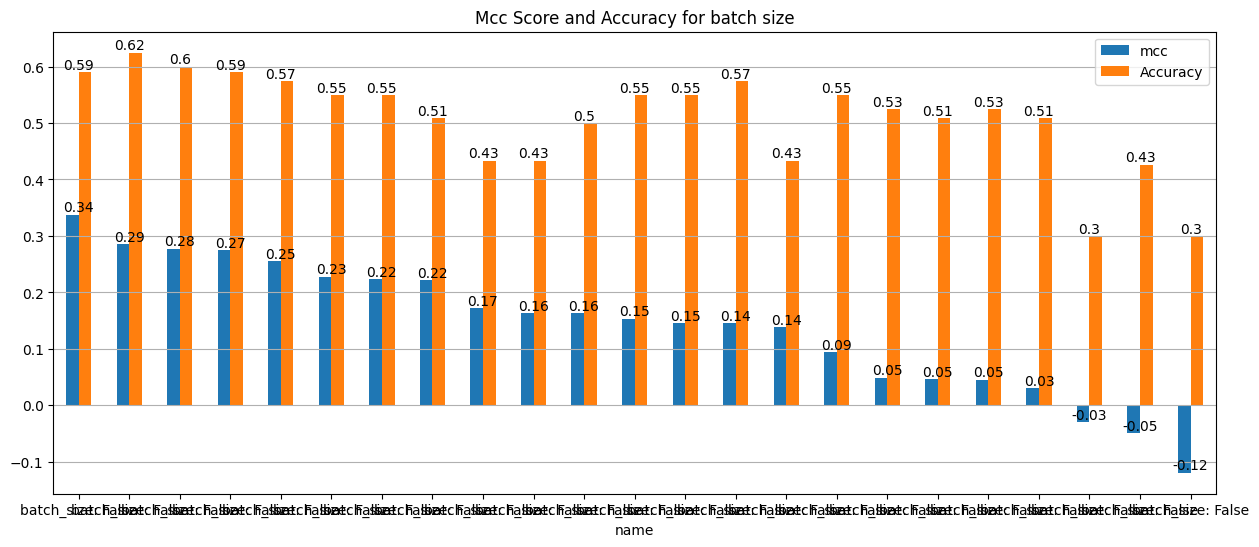

In [69]:
import matplotlib.pyplot as plt
result.plot(x='name', y=['mcc', 'Accuracy'], kind='bar', figsize=(15, 6))

# Annotate the y-axis values on the bars for "F1 Score"
for index, value in enumerate(result['mcc']):
    plt.annotate(str(round(value, 2)), xy=(index, value), ha='center', va='bottom')
    
    
# Annotate the y-axis values on the bars for "F1 Score"
for index, value in enumerate(result['Accuracy']):
    plt.annotate(str(round(value, 2)), xy=(index, value), ha='center', va='bottom')
    
plt.title('Mcc Score and Accuracy for batch size')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.grid(axis='y')  # Add horizontal gridlines
plt.show()


In [70]:
result_MA = result[result['trend_def']== 'MA']
result_MA.sort_values(by=['reversal_f1_score'], ascending=False, inplace=True)

KeyError: 'reversal_f1_score'

In [ ]:
result_MA['name'] = result_MA['trend_def']+',\nlearning_rate: '+ result_MA['learning_rate'].astype(str)

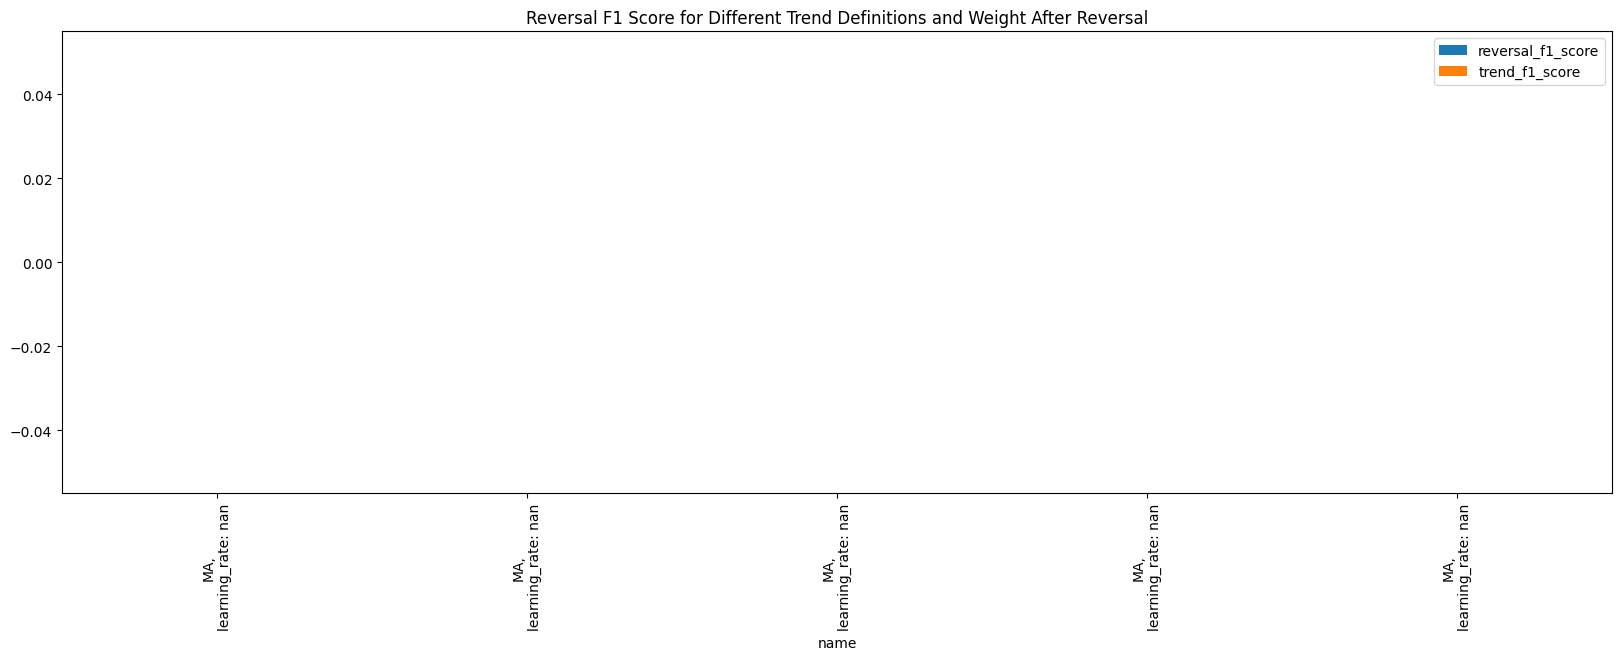

In [ ]:
import matplotlib.pyplot as plt
result_MA.plot(x='name', y=['reversal_f1_score', 'trend_f1_score'], kind='bar', figsize=(20, 6))

# Annotate the y-axis values on the bars for "F1 Score"
for index, value in enumerate(result_MA['reversal_f1_score']):
    plt.annotate(str(round(value, 2)), xy=(index, value), ha='center', va='bottom')

# Annotate the y-axis values on the bars for "Total return"
for index, value in enumerate(result_MA['trend_f1_score']):
    plt.annotate(str(round(value, 2)), xy=(index, value), ha='center', va='bottom')

plt.title('Reversal F1 Score for Different Trend Definitions and Weight After Reversal')
plt.xticks(rotation=90)  # Rotate x-axis labels to be horizontal
plt.show()



In [ ]:
import numpy as np

signal = np.array([[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]])
original_weights = np.array([[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]])
two_time_weights = np.array([[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]])
five_time_weights = np.array([[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [5, 5], [5, 5], [5, 5], [5, 5], [5, 5]])
ten_time_weights = np.array([[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [10, 10], [10, 10], [10, 10], [10, 10], [10, 10]])

In [ ]:
print('signal:\n', signal)

signal:
 [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [ ]:
print('Original weights:\n', original_weights)
print('Two-time weights:\n', two_time_weights)
print('Five-time weights:\n', five_time_weights)
print('Ten-time weights:\n', ten_time_weights)

Original weights:
 [[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
Two-time weights:
 [[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
Five-time weights:
 [[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]]
Ten-time weights:
 [[ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [10 10]
 [10 10]
 [10 10]
 [10 10]
 [10 10]]


In [ ]:
original_weights[:, 0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

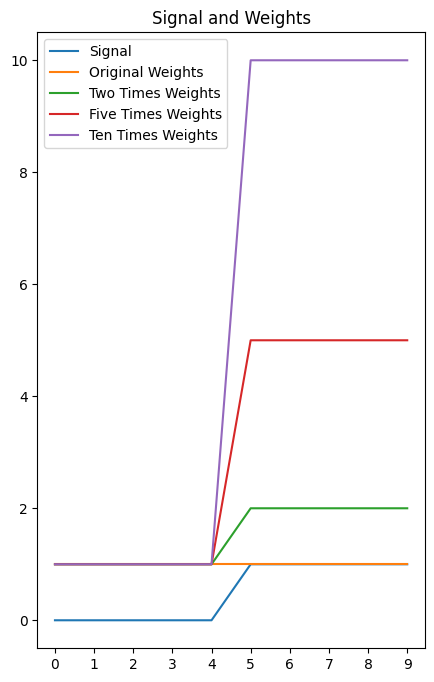

In [ ]:
plt.figure(figsize=(5, 8))
plt.plot(signal[:, 1], label='Signal')
plt.plot(original_weights[:, 1], label='Original Weights')
plt.plot(two_time_weights[:, 1], label='Two Times Weights')
plt.plot(five_time_weights[:, 1], label='Five Times Weights')
plt.plot(ten_time_weights[:, 1], label='Ten Times Weights')
plt.xticks(range(10))
plt.legend()
plt.title('Signal and Weights')
plt.show()


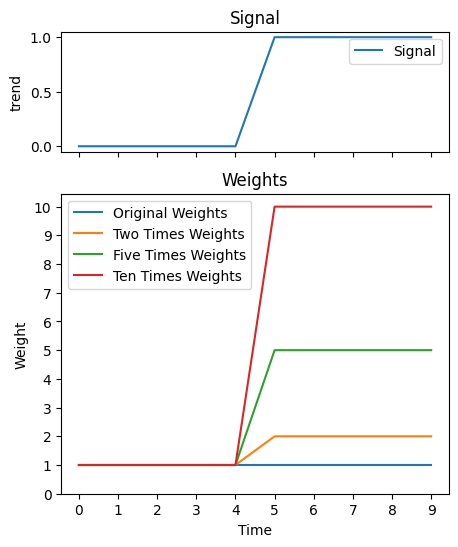

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(5, 6), sharex=True, gridspec_kw={"height_ratios": [2, 5]})
ax[0].plot(signal[:, 1], label='Signal')
ax[0].set_title('Signal')
ax[0].legend()
ax[0].set_xticks(range(10))
ax[0].set_ylabel('trend')

ax[1].plot(original_weights[:, 1], label='Original Weights')
ax[1].plot(two_time_weights[:, 1], label='Two Times Weights')
ax[1].plot(five_time_weights[:, 1], label='Five Times Weights')
ax[1].plot(ten_time_weights[:, 1], label='Ten Times Weights')
ax[1].set_title('Weights')
ax[1].legend()
ax[1].set_xticks(range(10))
ax[1].set_yticks(range(0, 11))
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Weight')

plt.show()


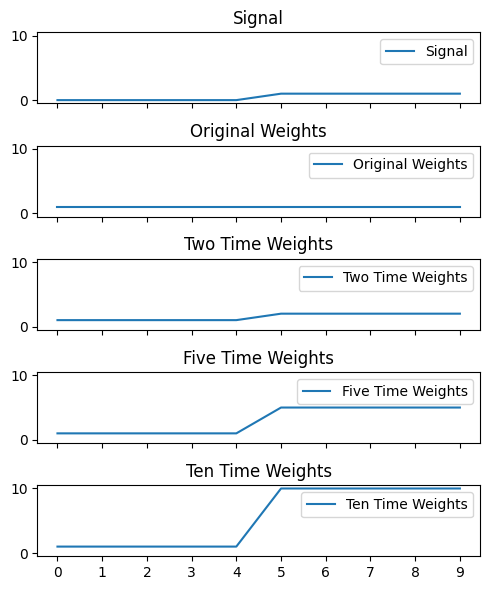

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(5, 6), sharex=True, sharey=True)
ax[0].plot(signal[:, 1], label='Signal')
ax[0].set_title('Signal')
ax[0].legend()
ax[0].set_xticks(range(10))
ax[1].plot(original_weights[:, 1], label='Original Weights')
ax[1].set_title('Original Weights')
ax[1].legend()

ax[2].plot(two_time_weights[:, 1], label='Two Time Weights')
ax[2].set_title('Two Time Weights')
ax[2].legend()

ax[3].plot(five_time_weights[:, 1], label='Five Time Weights')
ax[3].set_title('Five Time Weights')
ax[3].legend()

ax[4].plot(ten_time_weights[:, 1], label='Ten Time Weights')
ax[4].set_title('Ten Time Weights')
ax[4].legend()

plt.tight_layout()
plt.show()


In [ ]:
# signal = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

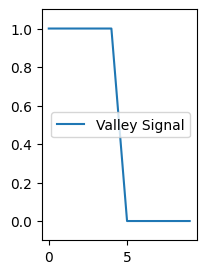

In [ ]:
plt.figure(figsize=(2, 3))
plt.plot(signal[:, 0], label='Valley Signal')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()